In [1]:
import matplotlib.pyplot as plt
import common.plot as plot
import common.util as util
from common.EstimatedPdf import EstimatedPdf
from c8.WaitTimeCalculator import WaitTimeCalculator
from c8.ElapsedTimeEstimator import ElapsedTimeEstimator
from c8.ArrivalRateEstimator import ArrivalRateEstimator
from c8.WaitMixtureEstimator import WaitMixtureEstimator
from c8.c8_util import *
from common.util import make_cdf_from_list, make_pmf_from_list

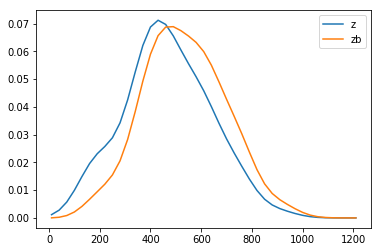

In [2]:
pmf_z = get_sample_pmf(name='z')
pmf_zb = bias_pmf(pmf_z, name='zb')
pmf_z.plot_with([pmf_zb])

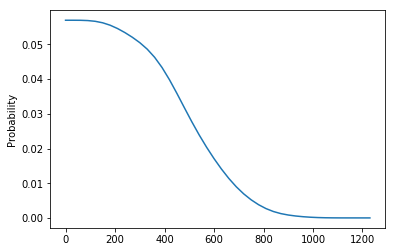

In [3]:
pmf_y = pmf_of_wait_time(pmf_zb)
pmf_y.plot()

z mean: 7.8 min
zb mean: 8.9 min
y mean: 4.6 min


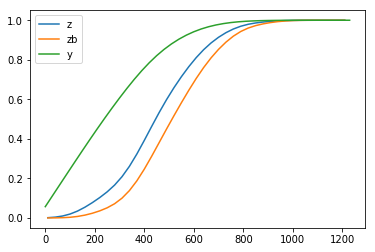

In [4]:
wtc = WaitTimeCalculator(pmf_z)
print("z mean: {:.1f} min\nzb mean: {:.1f} min\ny mean: {:.1f} min"
      .format(wtc.pmf_z.mean()/60, wtc.pmf_zb.mean()/60, wtc.pmf_y.mean()/60))
wtc.plot_cdf()

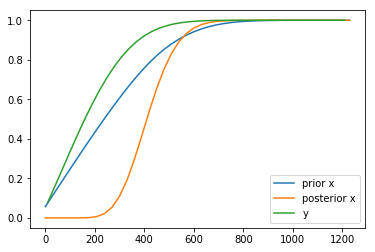

In [5]:
ete = ElapsedTimeEstimator(wtc)
ete.plot_cdf()

In [6]:
cdf_y = ete.pmf_y.make_cdf()
print("Probability of train comming in 5 minutes: {:.2f}"
      .format(cdf_y.prob(5*60)))

Probability of train comming in 5 minutes: 0.77


mean: 2.03


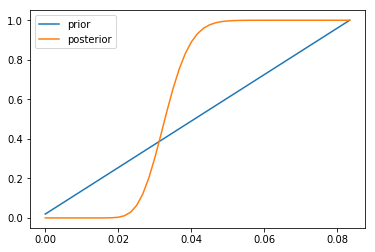

In [7]:
data = [[17, 4.6*60, 9], [22, 1.0*60, 0], [23, 1.4*60, 4], [18, 5.4*60, 12], [4, 5.8*60, 11]]

are = ArrivalRateEstimator(data)
print("mean: {:.2f}".format(are.post_lam.mean() * 60))
are.plot()

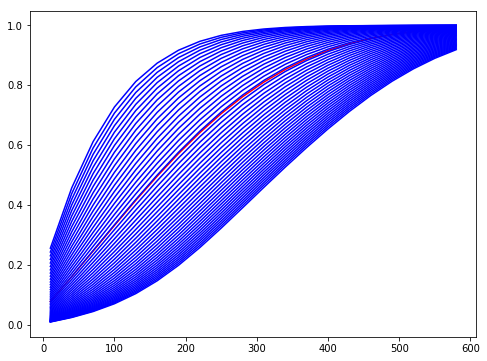

In [8]:
wme = WaitMixtureEstimator(wtc, are)
wme.plot()

In [9]:
n = 220
cdf_z = make_cdf_from_list(OBSERVED_GAP_TIMES)
sample_z = cdf_z.sample(n)
pmf_z = make_pmf_from_list(sample_z)

cdf_zb = bias_pmf(pmf_z).make_cdf()
sample_zb = cdf_zb.sample(n) + [1800, 2400, 3000]

pdf_zb = EstimatedPdf(sample_zb)
xs = make_range(low=60, high=4000)
pmf_zb = pdf_zb.make_pmf(xs)

pmf_z = unbias_pmf(pmf_zb)
wtc = WaitTimeCalculator(pmf_z)

[]

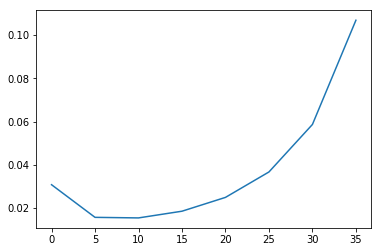

In [10]:
lst_num_passengers = [0, 5, 10, 15, 20, 25, 30, 35]
lst_probs = []
for num_passengers in lst_num_passengers:
    ete = ElapsedTimeEstimator(wtc, num_passengers=num_passengers)
    cdf_y = ete.pmf_y.make_cdf()
    prob = 1 - cdf_y.prob(15 * 60)
    lst_probs.append(prob)

plt.figure()
plt.plot(lst_num_passengers, lst_probs)
plt.plot()